In [1]:
from jupyterthemes import jtplot
import pandas as pd
import numpy as np
import seaborn as sns
from shapely.geometry import Point
from matplotlib import pyplot as plt
import geopandas as gpd
%matplotlib inline
jtplot.style()

Can't load requested DLL: C:\Program Files\GeoDa Software\ogr_FileGDB.dll
126: The specified module could not be found.

Can't load requested DLL: C:\Program Files\GeoDa Software\ogr_FileGDB.dll
126: The specified module could not be found.

Can't load requested DLL: C:\Program Files\GeoDa Software\ogr_MSSQLSpatial.dll
126: The specified module could not be found.

Can't load requested DLL: C:\Program Files\GeoDa Software\ogr_MSSQLSpatial.dll
126: The specified module could not be found.

Can't load requested DLL: C:\Program Files\GeoDa Software\ogr_OCI.dll
126: The specified module could not be found.

Can't load requested DLL: C:\Program Files\GeoDa Software\ogr_OCI.dll
126: The specified module could not be found.

Can't load requested DLL: C:\Program Files\GeoDa Software\ogr_PG.dll
126: The specified module could not be found.

Can't load requested DLL: C:\Program Files\GeoDa Software\ogr_PG.dll
126: The specified module could not be found.

Can't load requested DLL: C:\Program Fil

In [2]:
sfparcels = gpd.read_file('https://data.sfgov.org/resource/acdm-wktn.geojson?$limit=250000'); sfparcels.head()

,project_id_drop,from_address_num,date_map_alt,odd_even,zoning_code,zoning_district,pw_recorded_map,mapblklot,date_map_add,to_address_num,...,street_type,project_id_add,date_rec_drop,block_num,blklot,in_asr_secured_roll,date_rec_add,lot_num,active,geometry
0,None,0,None,E,P,PUBLIC,True,0001001,1998-07-01,0,...,None,ORIG_BASEMAP,None,0001,0001001,True,None,001,True,"MULTIPOLYGON (((-122.42200 37.80848, -122.4220..."
1,None,0,None,E,C-2,COMMUNITY BUSINESS,True,0002001,1998-07-01,0,...,None,ORIG_BASEMAP,None,0002,0002001,True,None,001,True,"MULTIPOLYGON (((-122.42083 37.80863, -122.4208..."
2,None,160,None,E,C-2,COMMUNITY BUSINESS,True,0004002,1998-07-01,160,...,ST,ORIG_BASEMAP,None,0004,0004002,True,None,002,True,"MULTIPOLYGON (((-122.41570 37.80833, -122.4157..."
3,None,206,None,E,C-2,COMMUNITY BUSINESS,True,0005001,1998-07-01,286,...,ST,ORIG_BASEMAP,None,0005,0005001,True,None,001,True,"MULTIPOLYGON (((-122.41735 37.80812, -122.4174..."
4,None,350,None,E,C-2,COMMUNITY BUSINESS,True,0006001,1998-07-01,366,...,ST,ORIG_BASEMAP,None,0006,0006001,True,None,001,True,"MULTIPOLYGON (((-122.41897 37.80791, -122.4191..."


In [3]:
APN_tax_res = pd.read_csv('C:/Users/Rohan/Documents/NYU/PUI/SFPermitTimes/Data/APNTaxData.csv', index_col=0); APN_tax_res.head()

,Parcel Number,Number of Rooms,Property Area,Total Taxable Value
0,0024002,10.0,2770.0,843421.0
1,0024005,13.0,2812.0,1832895.0
2,0024006,12.0,3402.0,443974.0
3,0024007,10.0,2437.0,168992.0
4,0024009,0.0,7498.0,1382702.0


In [12]:
sfparcels_tax_merged_blklot = sfparcels.merge(APN_tax_res, how = 'inner', left_on = 'blklot', right_on = 'Parcel Number'); sfparcels_tax_merged_blklot.shape

(191703, 27)

In [13]:
sfparcels_tax_merged_mapblklot = sfparcels.merge(APN_tax_res, how = 'inner', left_on = 'mapblklot', right_on = 'Parcel Number'); sfparcels_tax_merged_mapblklot.shape

(186585, 27)

In [6]:
sfparcels_tax_merged.to_csv('C:/Users/Rohan/Documents/NYU/PUI/SFPermitTimes/Data/parcels_taxvals_merged.csv')

<AxesSubplot:>

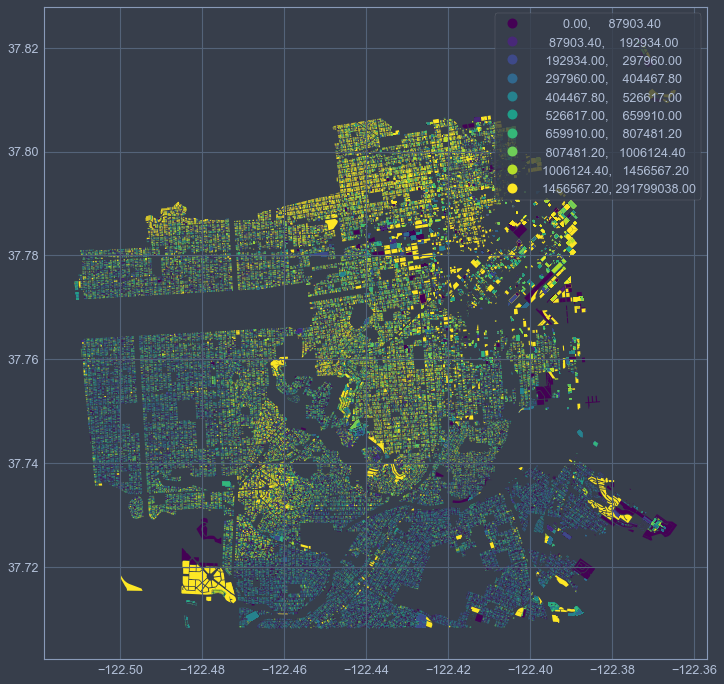

In [8]:
sfparcels_tax_merged.plot(figsize = (12, 12), column = 'Total Taxable Value', scheme = 'Quantiles', k = 10, legend = True)

In [22]:
dbi_data = pd.read_csv('https://media.githubusercontent.com/media/rohanskalyani/sfpermittimes/main/Data/SFDBI_Permits.csv?raw=true'); dbi_data.head()

,record_id,issued_date,zipcode,neighborhoods_analysis_boundaries,proposed_use,description,revised_cost,site_permit,plansets,permit_creation_date,...,street_suffix,proposed_units,permit_type,number_of_proposed_stories,supervisor_district,street_number,geometry,wait_time,year,Parcel Number
0,1617325518499,2021-10-20,94121,Bayview Hunters Point,public assmbly other,to erect a 1 story type v building for sfmta f...,9300000.0,True,2,2021-05-20T00:00:00,...,St,0.0,2,1.0,10,401,POINT (-122.3833669641401 37.75244380220047),147.0,2021,4300001
1,1617322518499,2021-10-20,94121,Bayview Hunters Point,public assmbly other,to erect a 1 story type v building for sfmta,13400000.0,True,2,2021-05-20T00:00:00,...,St,0.0,2,1.0,10,401,POINT (-122.3833669641401 37.75244380220047),153.0,2021,4300001
2,1617324518499,2021-10-20,94121,Bayview Hunters Point,public assmbly other,to erect a 1 story type v building for sfmta b...,9300000.0,True,2,2021-05-20T00:00:00,...,St,0.0,2,1.0,10,401,POINT (-122.3833669641401 37.75244380220047),147.0,2021,4300001
3,1613267517972,2021-11-12,94134,McLaren Park,recreation bldg,"to erect a one story, no dwelling, no basement...",10000000.0,True,2,2021-03-26T00:00:00,...,St,0.0,2,1.0,10,160,POINT (-122.4163554123144 37.71747881878296),231.0,2021,6220002
4,1628996520161,2021-11-16,94134,Portola,misc group residns.,"to erect 1 story r-3 occupancy , no basement, ...",160000.0,False,2,2021-03-19T00:00:00,...,St,1.0,2,1.0,9,1310,POINT (-122.4161703173775 37.72578977315479),242.0,2021,5992A072


In [23]:
sfparcels_tax_merged_blklot.columns

Index(['project_id_drop', 'from_address_num', 'date_map_alt', 'odd_even',
       'zoning_code', 'zoning_district', 'pw_recorded_map', 'mapblklot',
       'date_map_add', 'to_address_num', 'street_name', 'project_id_alt',
       'date_map_drop', 'street_type', 'project_id_add', 'date_rec_drop',
       'block_num', 'blklot', 'in_asr_secured_roll', 'date_rec_add', 'lot_num',
       'active', 'geometry', 'Parcel Number', 'Number of Rooms',
       'Property Area', 'Total Taxable Value'],
      dtype='object')

In [24]:
blklot_merge = sfparcels_tax_merged_blklot.merge(dbi_data, how = 'inner', left_on = 'mapblklot', right_on = 'Parcel Number' ); blklot_merge.shape

(691, 59)

In [25]:
mapblklot_merge = sfparcels_tax_merged_mapblklot.merge(dbi_data, how = 'inner', left_on = 'mapblklot', right_on = 'Parcel Number' ); mapblklot_merge.shape

(689, 59)

In [26]:
blklot_merge_2 = sfparcels_tax_merged_blklot.merge(dbi_data, how = 'inner', left_on = 'blklot', right_on = 'Parcel Number' ); blklot_merge_2.shape

(579, 59)

In [27]:
mapblklot_merge_2 = sfparcels_tax_merged_mapblklot.merge(dbi_data, how = 'inner', left_on = 'blklot', right_on = 'Parcel Number' ); mapblklot_merge_2.shape

(579, 59)